In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\pyythonn\Assignment 1\cleaned_data.csv")

In [3]:
df.head()

invoice_no customer_id  category  quantity    price invoice_date  \
0    I138884     C241288  Clothing         5  1500.40   2022-08-05   
1    I317333     C111565     Shoes         3  1800.51   2021-12-12   
2    I127801     C266599  Clothing         1   300.08   2021-11-09   
3    I173702     C988172     Shoes         5  3000.85   2021-05-16   
4    I337046     C189076     Books         4    60.60   2021-10-24   

    shopping_mall  gender   age payment_method  total_sales age_group  year  \
0          Kanyon  Female  28.0    Credit Card      7502.00     20-29  2022   
1  Forum Istanbul    Male  21.0     Debit Card      5401.53     20-29  2021   
2       Metrocity    Male  20.0           Cash       300.08      Teen  2021   
3    Metropol AVM  Female  66.0    Credit Card     15004.25       40+  2021   
4          Kanyon  Female  53.0           Cash       242.40       40+  2021   

   month day_name  
0      8   Friday  
1     12   Sunday  
2     11  Tuesday  
3      5   Sunday  
4     10   Sunday

In [4]:
print(df.describe())

           quantity         price           age   total_sales          year  \
count  99457.000000  99457.000000  99457.000000  99457.000000  99457.000000   
mean       3.003429    689.256321     43.425350   2528.789268   2021.629408   
std        1.413025    941.184567     14.980437   4222.475781      0.636136   
min        1.000000      5.230000     18.000000      5.230000   2021.000000   
25%        2.000000     45.450000     30.000000    136.350000   2021.000000   
50%        3.000000    203.300000     43.000000    600.170000   2022.000000   
75%        4.000000   1200.320000     56.000000   2700.720000   2022.000000   
max        5.000000   5250.000000     69.000000  26250.000000   2023.000000   

              month  
count  99457.000000  
mean       6.113898  
std        3.569511  
min        1.000000  
25%        3.000000  
50%        6.000000  
75%        9.000000  
max       12.000000  


In [5]:
df.shape

(99457, 15)

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.isnull().sum()

invoice_no        0
customer_id       0
category          0
quantity          0
price             0
invoice_date      0
shopping_mall     0
gender            0
age               0
payment_method    0
total_sales       0
age_group         0
year              0
month             0
day_name          0
dtype: int64

In [8]:
df.shape

(99457, 15)

In [9]:
# making a new target column ("spending_category")

# quantile building
spending_bins = pd.qcut(
    df["total_sales"],
    q=4,
    labels=['low', 'medium', 'high', 'very_high']
)

# range boundaries (edges)
quantile_ranges = pd.qcut(
    df["total_sales"],
    q=4,
    retbins=True
)

# assign the bin as new column
df["spending_category"] = spending_bins

# show bin ranges
print("Bin edges (Q0, Q1, Q2, Q3, Q4):")
print(quantile_ranges[1])

# distribution check
print("\nDistribution:")
print(df["spending_category"].value_counts())

Bin edges (Q0, Q1, Q2, Q3, Q4):
[5.23000e+00 1.36350e+02 6.00170e+02 2.70072e+03 2.62500e+04]

Distribution:
spending_category
low          25840
high         24923
medium       24849
very_high    23845
Name: count, dtype: int64


In [10]:
# Create Target Column: Spending_Category
def spending_category(sales):
    if sales > 2700:
        return "Very High"
    elif sales > 600:
        return "High"
    elif sales > 135:
        return "Medium"
    else:
        return "Low"

In [11]:
df["spending_category"]

0        very_high
1        very_high
2           medium
3        very_high
4           medium
           ...    
99452       medium
99453          low
99454          low
99455    very_high
99456          low
Name: spending_category, Length: 99457, dtype: category
Categories (4, object): ['low' < 'medium' < 'high' < 'very_high']

In [12]:
df.head()

invoice_no customer_id  category  quantity    price invoice_date  \
0    I138884     C241288  Clothing         5  1500.40   2022-08-05   
1    I317333     C111565     Shoes         3  1800.51   2021-12-12   
2    I127801     C266599  Clothing         1   300.08   2021-11-09   
3    I173702     C988172     Shoes         5  3000.85   2021-05-16   
4    I337046     C189076     Books         4    60.60   2021-10-24   

    shopping_mall  gender   age payment_method  total_sales age_group  year  \
0          Kanyon  Female  28.0    Credit Card      7502.00     20-29  2022   
1  Forum Istanbul    Male  21.0     Debit Card      5401.53     20-29  2021   
2       Metrocity    Male  20.0           Cash       300.08      Teen  2021   
3    Metropol AVM  Female  66.0    Credit Card     15004.25       40+  2021   
4          Kanyon  Female  53.0           Cash       242.40       40+  2021   

   month day_name spending_category  
0      8   Friday         very_high  
1     12   Sunday         very_high  
2     11  Tuesday            medium  
3      5   Sunday         very_high  
4     10   Sunday            medium

In [13]:
# Drop unnecessary columns
df = df.drop(columns=["customer_id", "invoice_date", "price", "quantity", "age_group", "total_sales", "invoice_no"])

In [14]:
df.columns

Index(['category', 'shopping_mall', 'gender', 'age', 'payment_method', 'year',
       'month', 'day_name', 'spending_category'],
      dtype='object')

In [ ]:
g = sns.pairplot(df, hue="spending_category")
#g.savefig(r"C:\pyythonn\Assignment 1\pairplot.png", dpi=300, bbox_inches='tight')
plt.show()

In [15]:
X = df.drop(columns=["spending_category"])
y = df["spending_category"]

In [16]:
#splitting data into train 80% and test 20%
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [17]:
from sklearn.preprocessing import LabelEncoder

# Encode target
le_target = LabelEncoder()
y_train = le_target.fit_transform(y_train)
y_test = le_target.transform(y_test)

# Day_Name mapping (ordinal)
day_map = {
    "Monday": 1, "Tuesday": 2, "Wednesday": 3,
    "Thursday": 4, "Friday": 5, "Saturday": 6, "Sunday": 7
}
X_train["day_name"] = X_train["day_name"].map(day_map)
X_test["day_name"] = X_test["day_name"].map(day_map)

# Encode categorical columns in X
categorical_cols = ["gender", "payment_method", "category", "shopping_mall"]

encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])   # use same mapping
    encoders[col] = le  # store encoder for future use

In [18]:
X_train.head()

category  shopping_mall  gender   age  payment_method  year  month  \
36744         3              4       0  27.0               2  2021      7   
92004         3              3       1  35.0               2  2021     12   
86146         2              4       0  23.0               0  2023      2   
31576         1              7       0  22.0               2  2021      3   
87726         3              6       1  44.0               1  2022      6   

       day_name  
36744         1  
92004         3  
86146         2  
31576         5  
87726         4

In [19]:
y_train

array([1, 1, 1, ..., 2, 2, 3], shape=(79565,))

In [20]:
from sklearn.preprocessing import StandardScaler

# Select only numerical columns (confirm they exist in your dataset)
num_cols = ["age", "year", "month"]

scaler = StandardScaler()

# Make copies
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# Fit on training, transform both
X_train_scaled[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test_scaled[num_cols] = scaler.transform(X_test[num_cols])


In [21]:
X_train_scaled

category  shopping_mall  gender       age  payment_method      year  \
36744         3              4       0 -1.096013               2 -0.991708   
92004         3              3       1 -0.561798               2 -0.991708   
86146         2              4       0 -1.363121               0  2.154497   
31576         1              7       0 -1.429898               2 -0.991708   
87726         3              6       1  0.039193               1  0.581395   
...         ...            ...     ...       ...             ...       ...   
1496          1              5       0 -0.762129               1 -0.991708   
68702         1              7       0  1.040846               1 -0.991708   
36289         0              3       1 -1.029236               0  0.581395   
43261         1              1       1 -0.027584               0 -0.991708   
16364         1              2       0 -1.630228               0  0.581395   

          month  day_name  
36744  0.249890         1  
92004  1.649512         3  
86146 -1.149733         2  
31576 -0.869808         5  
87726 -0.030035         4  
...         ...       ...  
1496  -0.030035         1  
68702  0.249890         5  
36289  1.369588         1  
43261  0.809739         1  
16364 -0.030035         4  

[79565 rows x 8 columns]

In [22]:
 #Logistic Regression model
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Train
log_reg.fit(X_train_scaled, y_train)

# Predict
y_pred = log_reg.predict(X_test_scaled)

In [23]:
# Decision Tree model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier(random_state=42, max_depth=None)  # max_depth=None means pura tree grow karega
dt.fit(X_train_scaled, y_train)

# Predict
y_pred_dt = dt.predict(X_test_scaled)

# Accuracy
acc = accuracy_score(y_test, y_pred_dt)
print("Accuracy:", acc)

Accuracy: 0.5011562437160667


In [24]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_model = RandomForestClassifier(n_estimators=200, max_depth=None, random_state=42)

# Train
rf_model.fit(X_train_scaled, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test_scaled)

# Accuracy
acc = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", acc)

Accuracy: 0.5458978483812588


In [25]:
# KNN model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=5)

#Train
knn.fit(X_train_scaled, y_train)

#Predict on test set
y_pred_knn = knn.predict(X_test_scaled)

# Accuracy
acc = accuracy_score(y_test, y_pred_knn)
print("Accuracy:", acc)

Accuracy: 0.5019103157048059


In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Function to evaluate models
def evaluate_model(y_true, y_pred, model_name):
    return {
        "Model": model_name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, average="weighted"),
        "Recall": recall_score(y_true, y_pred, average="weighted"),
        "F1-score": f1_score(y_true, y_pred, average="weighted")
    }

# Collect all results
results = []
print("done")

done


In [27]:
results.append(evaluate_model(y_test, y_pred, "Logistic Regression"))
results.append(evaluate_model(y_test, y_pred_dt, "Decision Tree"))
results.append(evaluate_model(y_test, y_pred_rf, "Random Forest"))
results.append(evaluate_model(y_test, y_pred_knn, "KNN"))

# Convert to DataFrame for clean table
results_df = pd.DataFrame(results)

print(results_df)

                 Model  Accuracy  Precision    Recall  F1-score
0  Logistic Regression  0.428313   0.336615  0.428313  0.356924
1        Decision Tree  0.501156   0.501286  0.501156  0.501181
2        Random Forest  0.545898   0.547830  0.545898  0.545469
3                  KNN  0.501910   0.510082  0.501910  0.502859


C:\Users\St.law\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


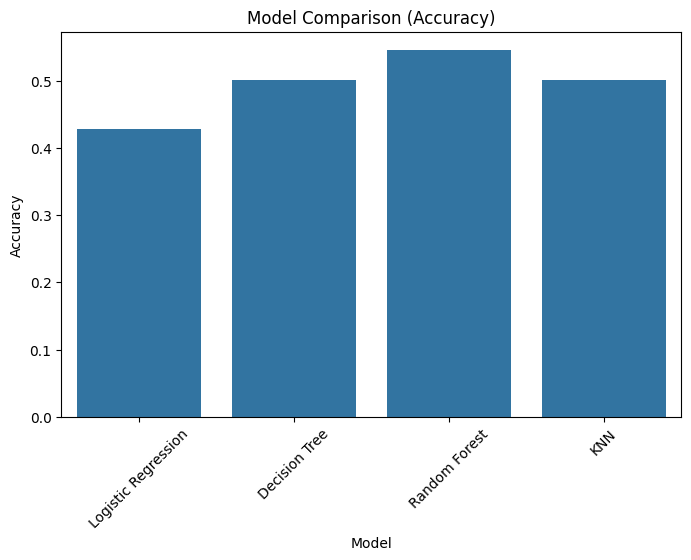

In [34]:
#Optional: Visualization
plt.figure(figsize=(8,5))
sns.barplot(x="Model", y="Accuracy", data=results_df)
plt.title("Model Comparison (Accuracy)")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.savefig(r"C:\pyythonn\Assignment 1\barplot.png", dpi=300, bbox_inches='tight')
plt.show()


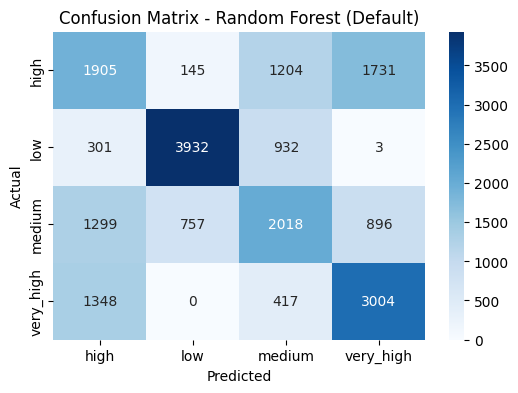

Classification Report (Random Forest - Default):

              precision    recall  f1-score   support

        high       0.39      0.38      0.39      4985
         low       0.81      0.76      0.79      5168
      medium       0.44      0.41      0.42      4970
   very_high       0.53      0.63      0.58      4769

    accuracy                           0.55     19892
   macro avg       0.55      0.54      0.54     19892
weighted avg       0.55      0.55      0.55     19892



In [33]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred_rf = rf_model.predict(X_test_scaled)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=le_target.classes_, 
            yticklabels=le_target.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest (Default)")
plt.savefig(r"C:\pyythonn\Assignment 1\heatmap.png", dpi=300, bbox_inches='tight')
plt.show()

#  Classification Report
print("Classification Report (Random Forest - Default):\n")
print(classification_report(y_test, y_pred_rf, target_names=le_target.classes_))
